In [1]:
import numpy as np, pandas as pd
train = pd.read_csv('C:/Users/hp 850/Desktop/train.csv')
train0 = train[ train['target']==0 ].copy()
train1 = train[ train['target']==1 ].copy()
train.sample(10)

ID_code  target    var_0   var_1    var_2    var_3    var_4  \
15715    train_15715       0   7.7562 -6.4233  11.5691   3.3669  10.1270   
174439  train_174439       0  12.7709  4.5337  14.4605   4.3512  13.7759   
182188  train_182188       0  13.3165 -1.1356   8.2264   8.4252  11.4944   
120433  train_120433       0  10.0804  3.2130  10.9541   8.1665  12.0185   
53752    train_53752       1  11.3993  2.0751   9.3448   9.3850  14.4881   
162562  train_162562       1  14.8753 -2.9762   9.3510   4.2330  11.4634   
131753  train_131753       1   9.9607 -2.0525   9.9818   9.0677   9.0033   
90693    train_90693       0  10.0125  3.2045   8.2436  10.5611   9.8739   
3937      train_3937       0  10.9746 -1.2810  13.2602   5.3442  11.1367   
41366    train_41366       0   8.0354 -2.7636  13.8906   9.6339  12.3213   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
15715    9.8348  4.3481  20.1717  ...   4.5614   9.0351   2.3164  -2.6387   
174439 -15.1622  4.2088  22.2604  ...   4.2776  10.0329   2.8254   6.2454   
182188  -4.1030  4.5837  15.1871  ...   7.9474   4.5745   5.6580   5.3520   
120433 -19.6428  6.4653  19.2439  ...  -3.3016   8.7492   2.4631   1.5279   
53752  -11.8289  6.2638  13.3957  ...   6.2527   7.2879  -0.3195   4.0258   
162562   1.2830  6.4650  17.1827  ...   3.2968   9.2681   0.5154   8.2235   
131753  -4.9572  6.6416  18.1374  ...   8.4323   5.8042   1.4130   6.0056   
90693   13.5260  6.7355  22.5179  ...   2.7349   6.0207   2.2982  -1.0168   
3937    -0.8359  5.5874  17.0435  ...   8.1860   2.4662   3.6526   7.0467   
41366    2.6743  3.9696  22.1733  ...   1.7115   6.8245  -0.2216   6.5827   

        var_194  var_195  var_196  var_197  var_198  var_199  
15715   16.7782  -1.2282  13.9294   9.1015  16.0199  12.1235  
174439  17.6250   0.3720   4.3013   8.1219  16.5861   4.8235  
182188  22.1826  -0.5239  -3.8681  10.3018  20.0652 -13.5956  
120433  15.1088   0.1673   3.5947   9.7930  16.1095  10.8822  
53752   20.6419  -0.3578  -2.8187   8.1399  20.2586  -1.1959  
162562  17.7299   3.0924   7.4880   8.9462  13.6623  -3.3886  
131753  15.1840  -0.9777   8.4840   8.0983   8.4724  -7.9512  
90693   14.6266  -0.4612  -0.0217   9.4175  14.9659  -0.7244  
3937    15.0644  -0.9848  -3.6833   8.9323  12.5815  10.0267  
41366   20.4830  -0.2984  14.2114   8.5071   8.2613  -1.3650  

[10 rows x 202 columns]

In [2]:
s = [0]*200
m = [0]*200
for i in range(200):
    s[i] = np.std(train['var_'+str(i)])
    m[i] = np.mean(train['var_'+str(i)])
def getp(i,x):
    c = 3 
    a = len( train1[ (train1['var_'+str(i)]>x-s[i]/c)&(train1['var_'+str(i)]<x+s[i]/c) ] ) 
    b = len( train0[ (train0['var_'+str(i)]>x-s[i]/c)&(train0['var_'+str(i)]<x+s[i]/c) ] )
    if a+b<500: return 0.1 
    return a / (a+b)
def smooth(x,st=1):
    for j in range(st):
        x2 = np.ones(len(x)) * 0.1
        for i in range(len(x)-2):
            x2[i+1] = 0.25*x[i]+0.5*x[i+1]+0.25*x[i+2]
        x = x2.copy()
    return x

Showing vars 0 to 7 ...


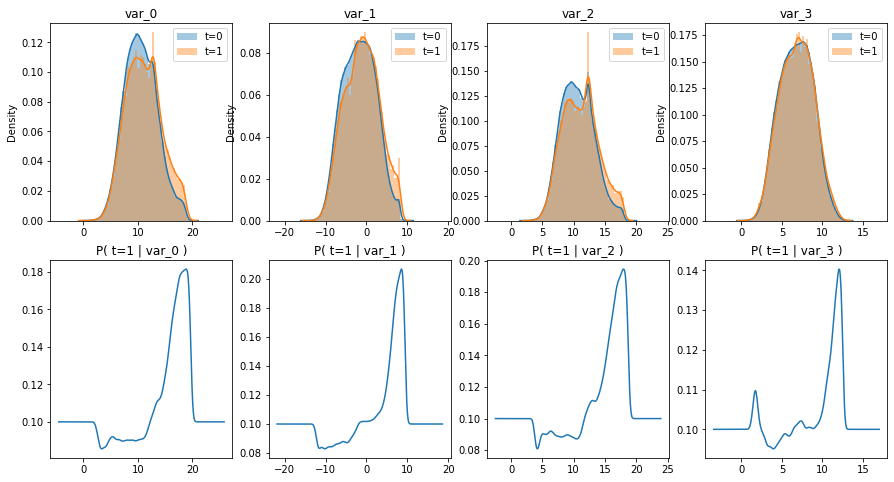

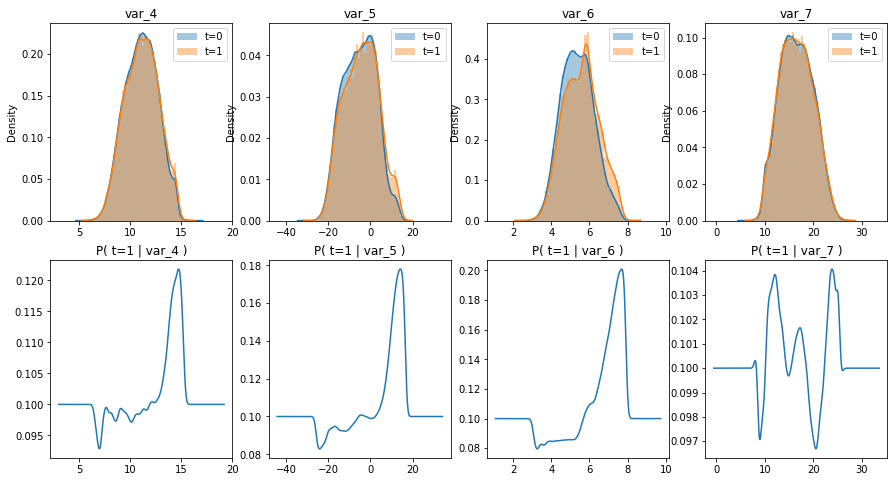

Showing vars 8 to 15 ...


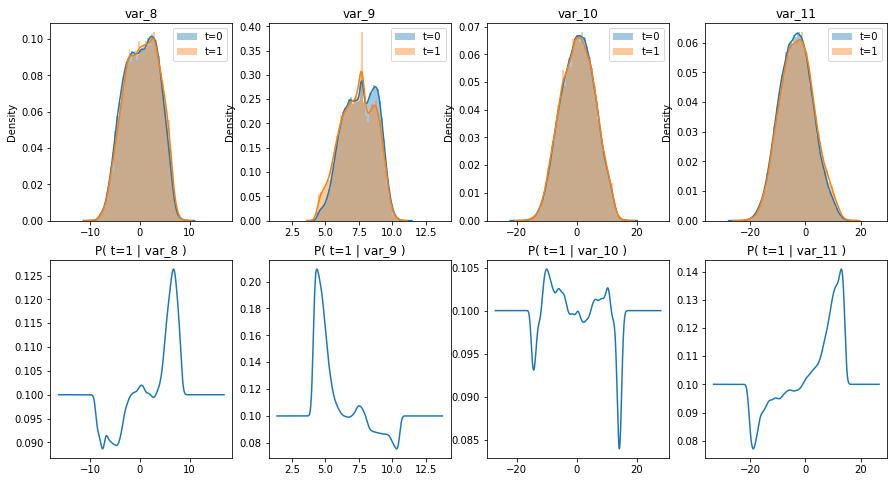

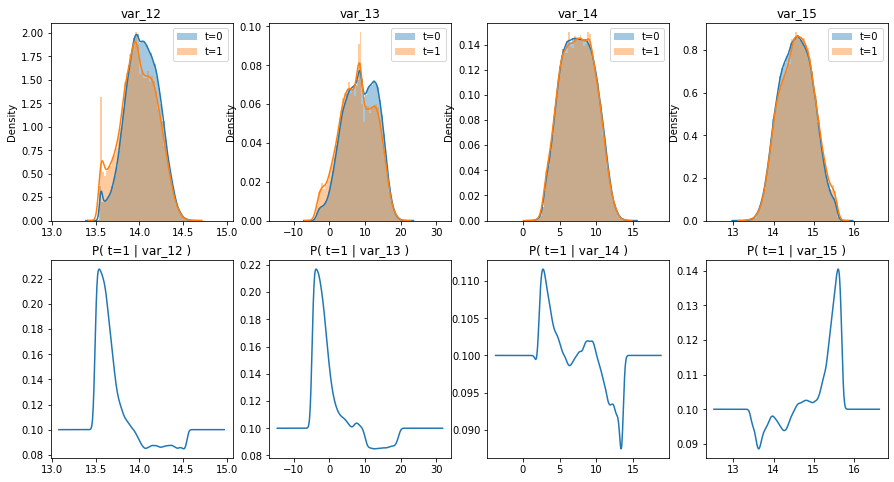

Showing vars 16 to 23 ...


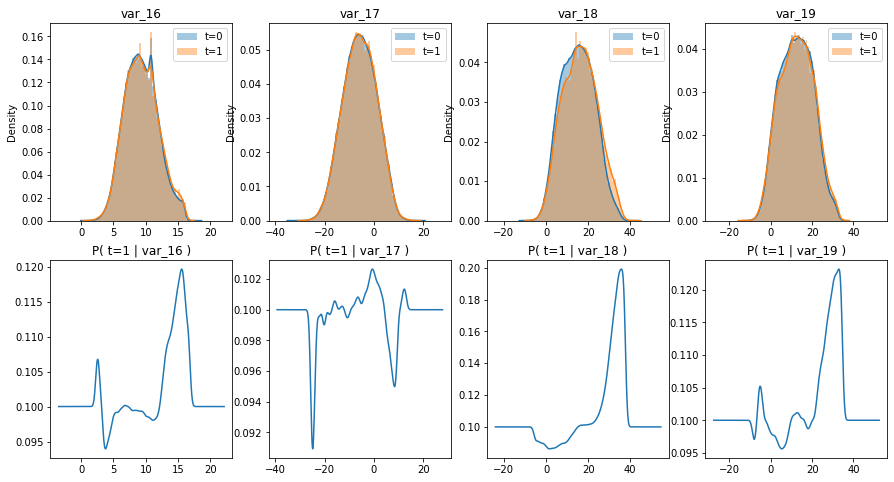

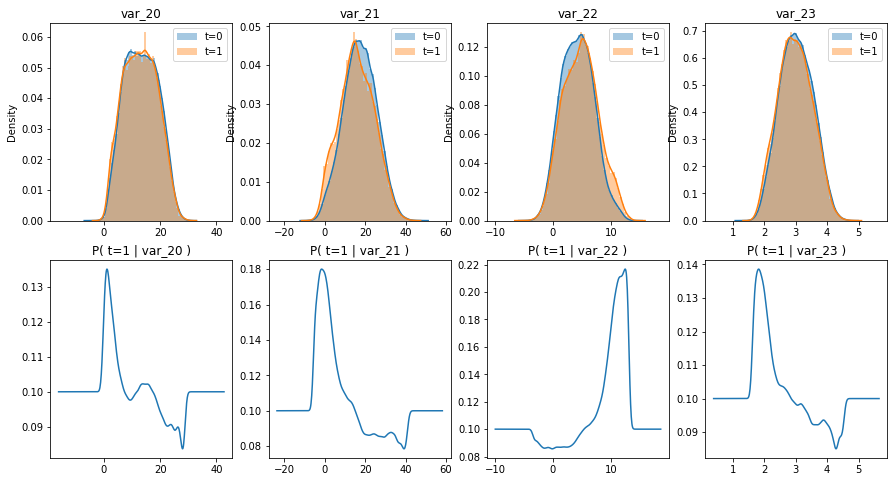

Showing vars 24 to 31 ...


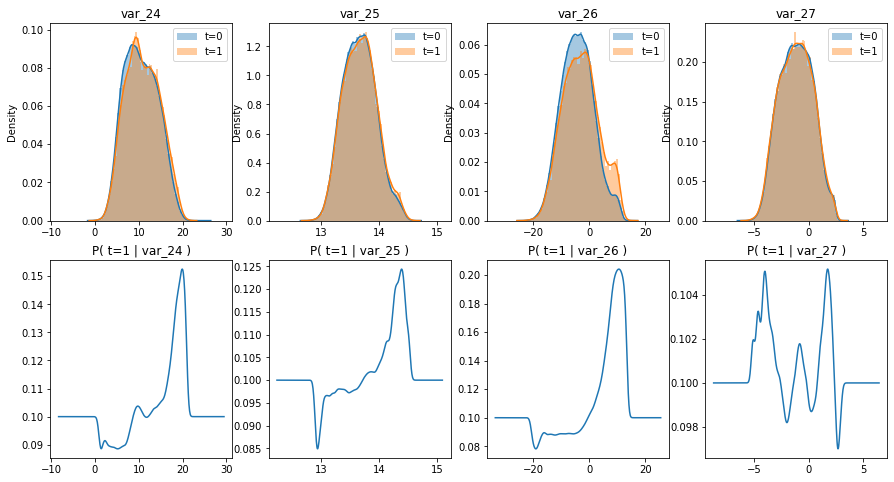

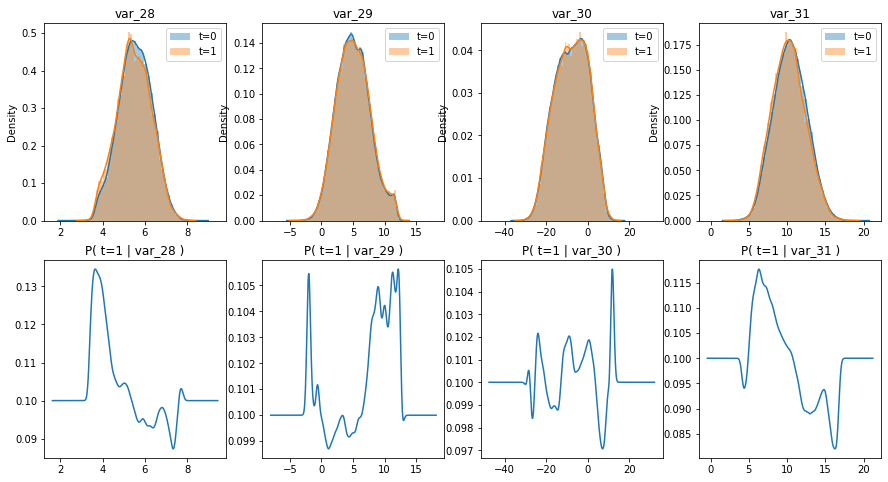

Showing vars 32 to 39 ...


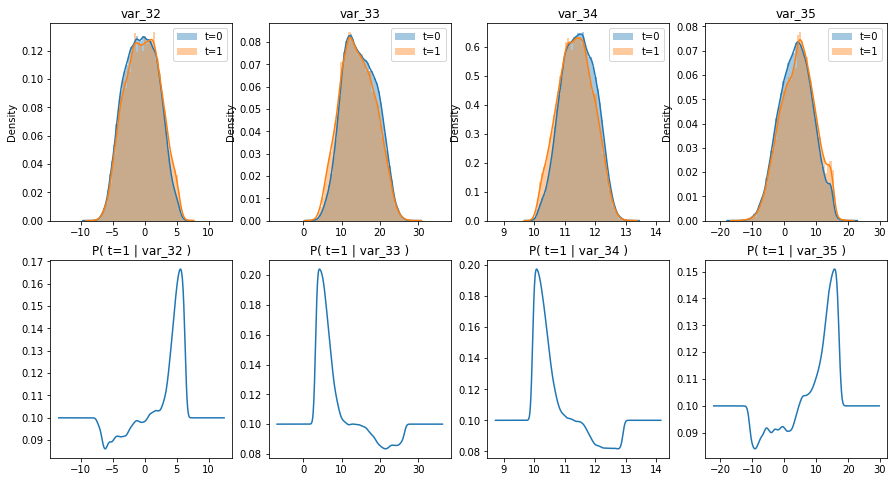

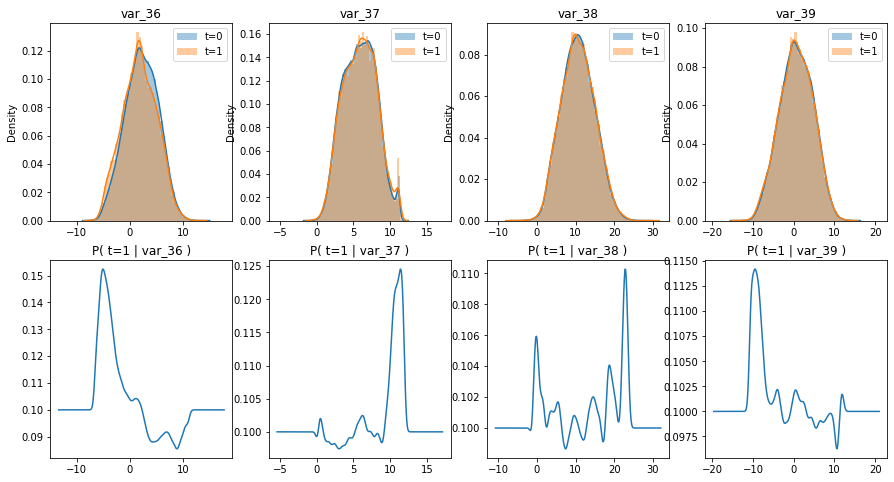

Showing vars 40 to 47 ...


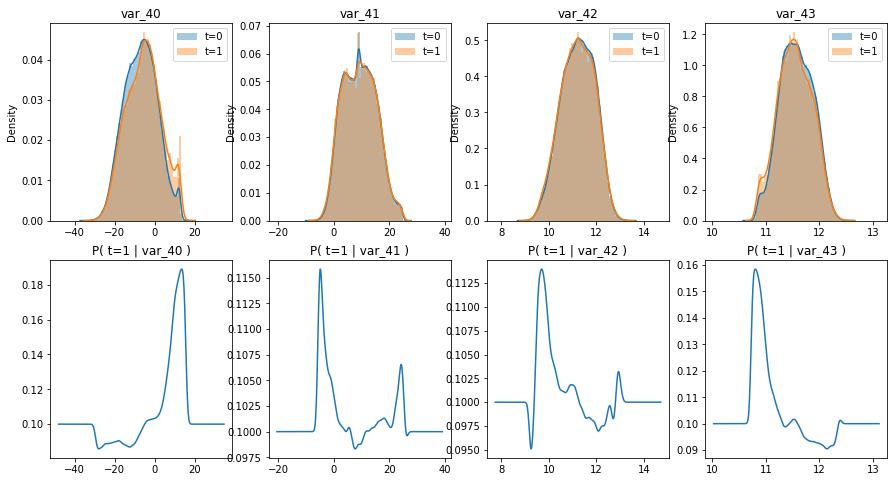

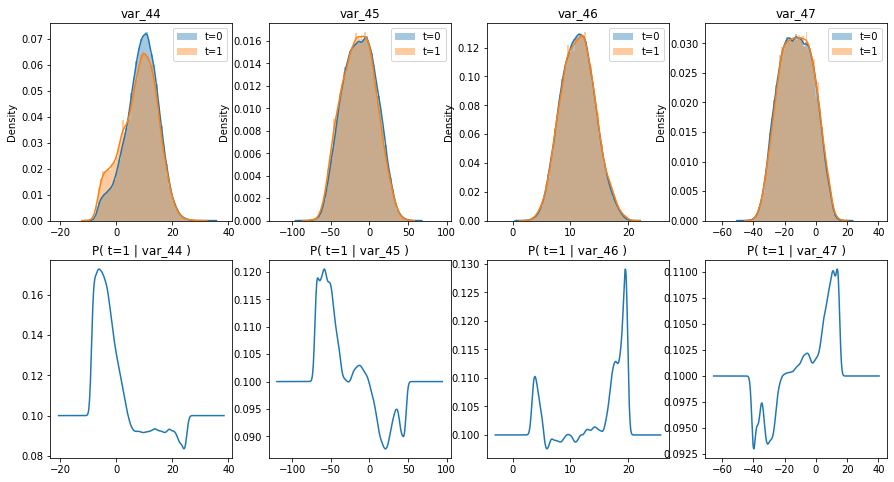

Showing vars 48 to 55 ...


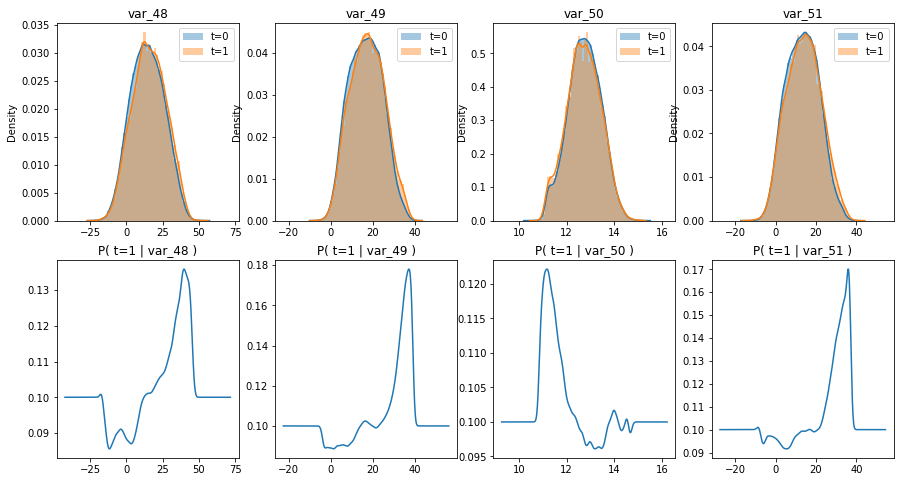

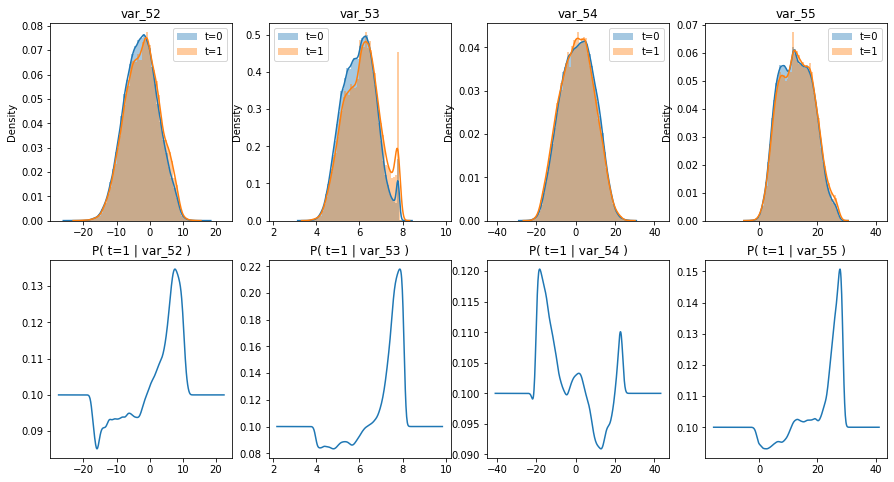

Showing vars 56 to 63 ...


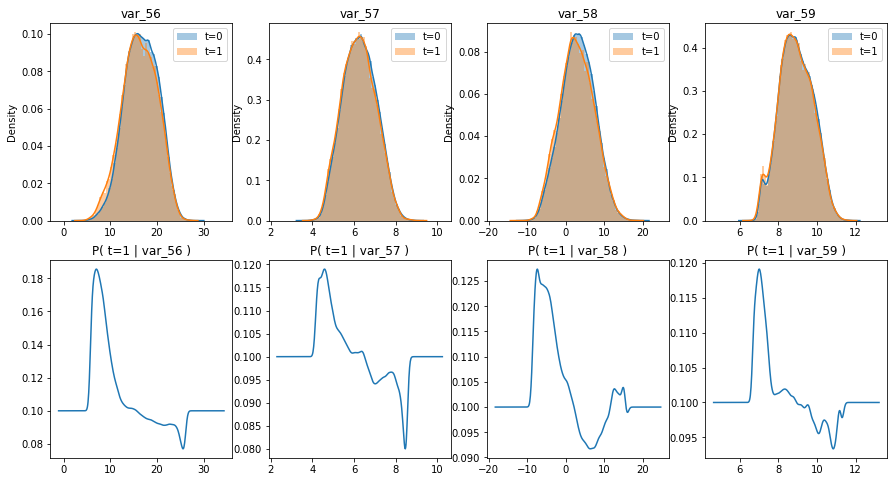

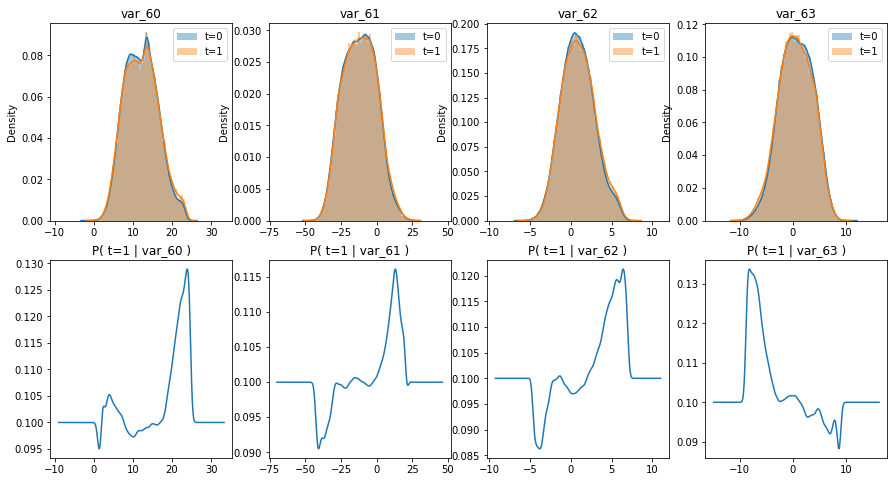

Showing vars 64 to 71 ...


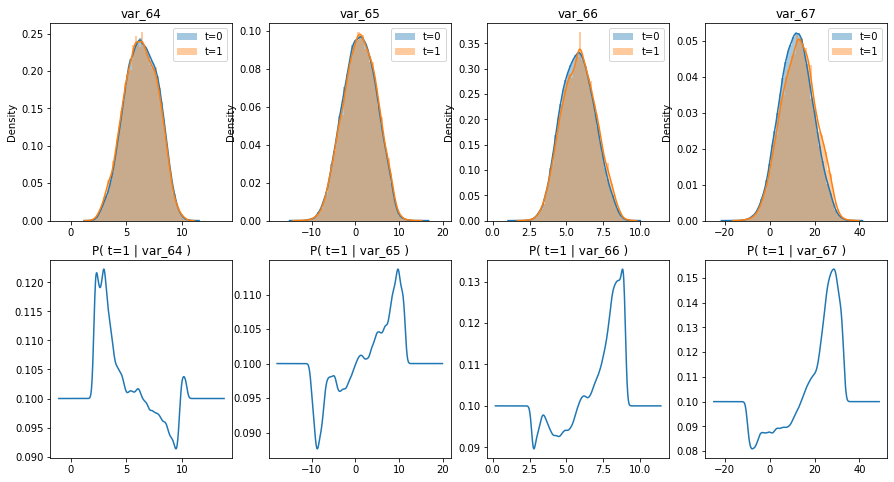

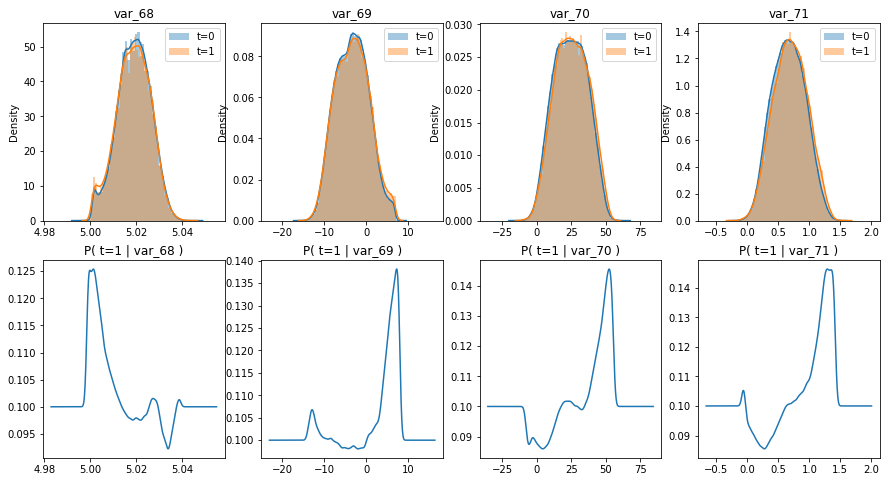

Showing vars 72 to 79 ...


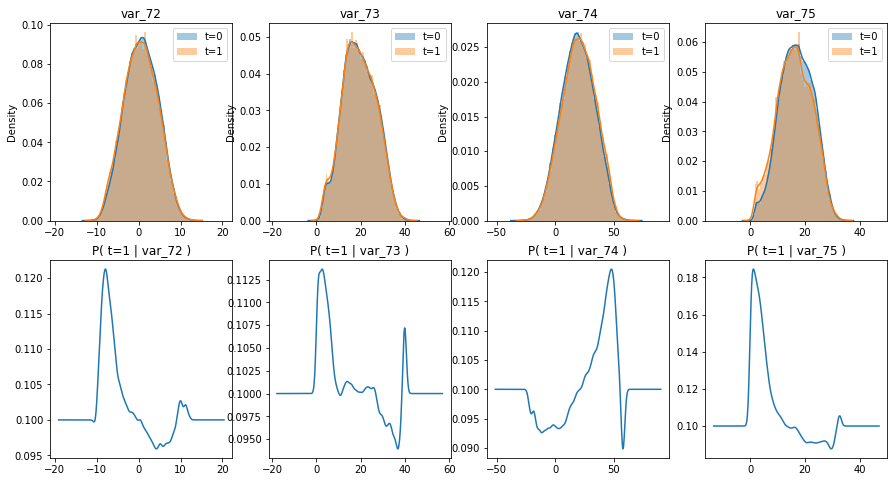

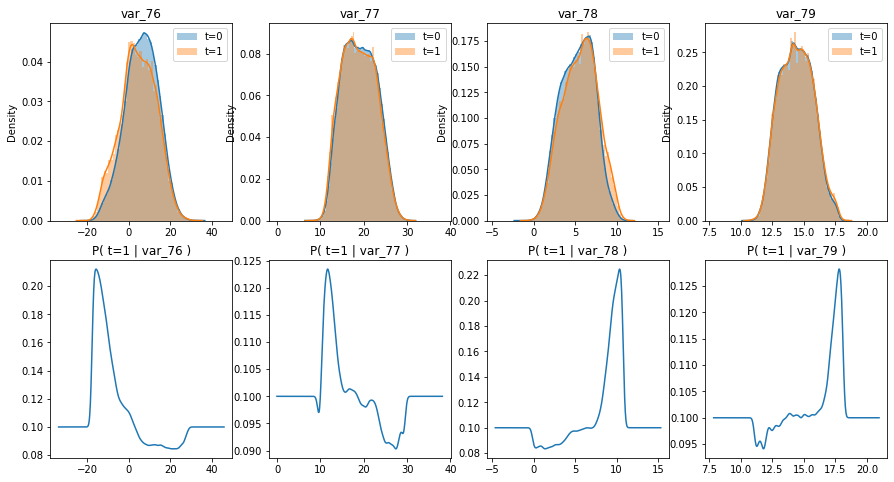

Showing vars 80 to 87 ...


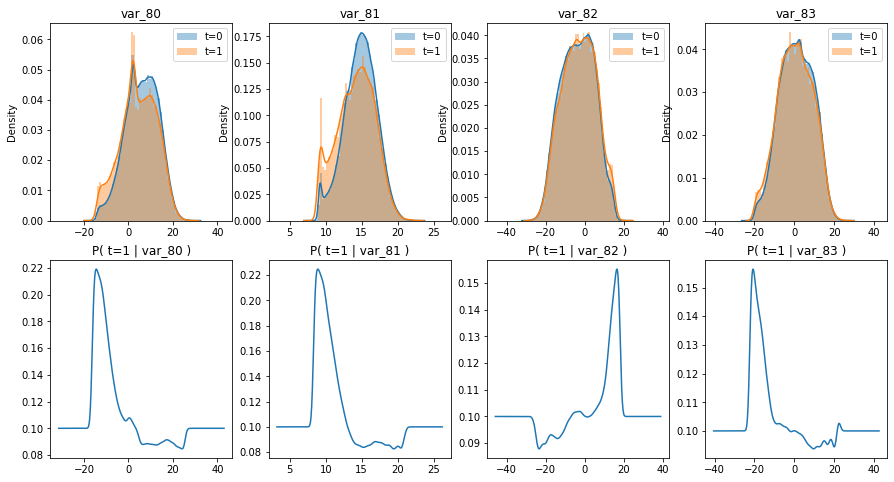

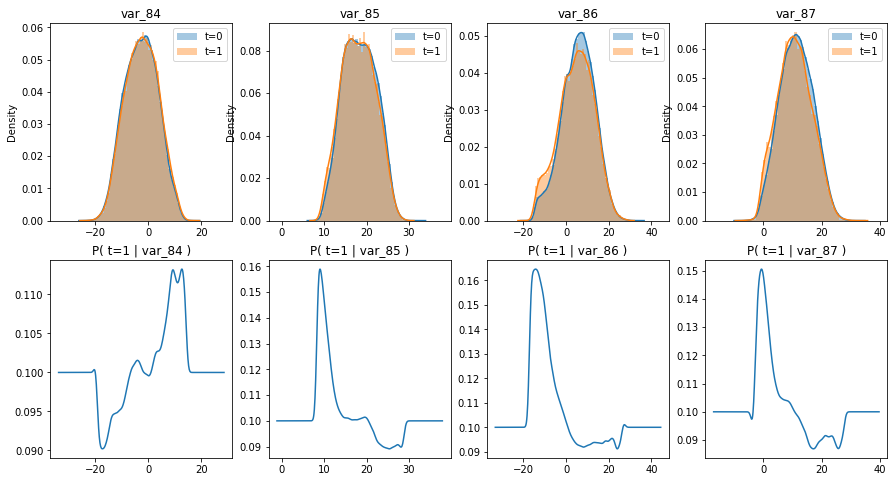

Showing vars 88 to 95 ...


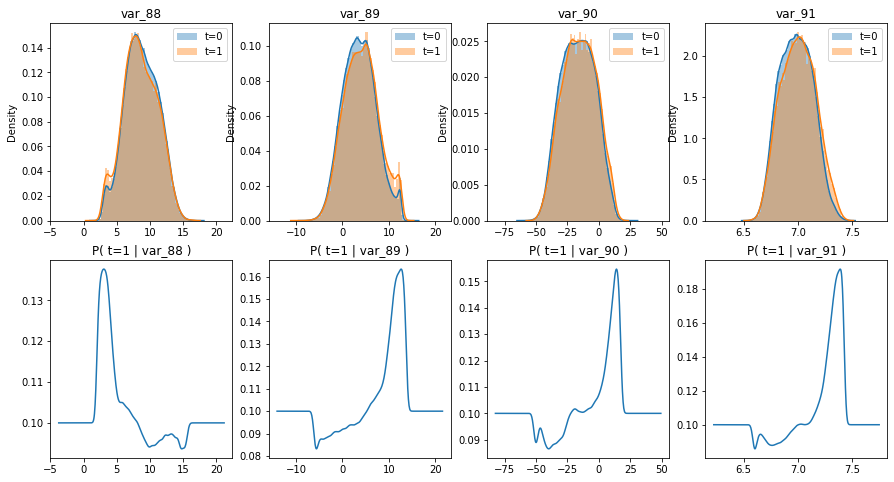

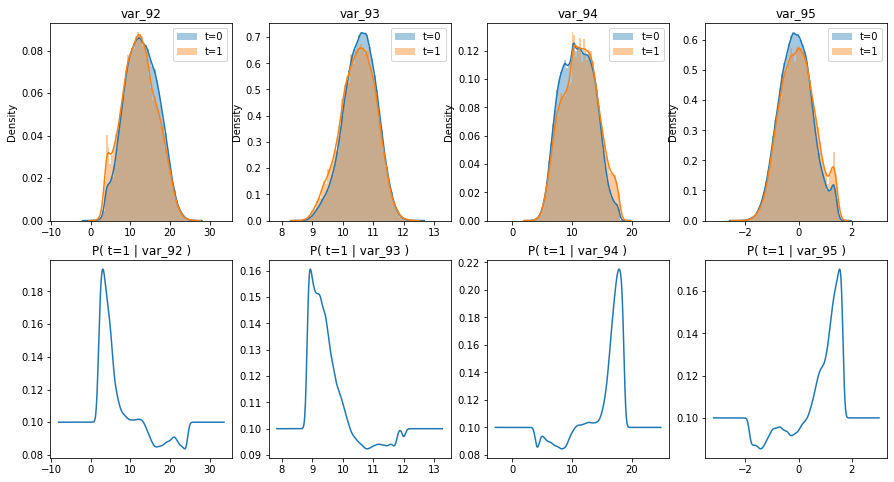

Showing vars 96 to 103 ...


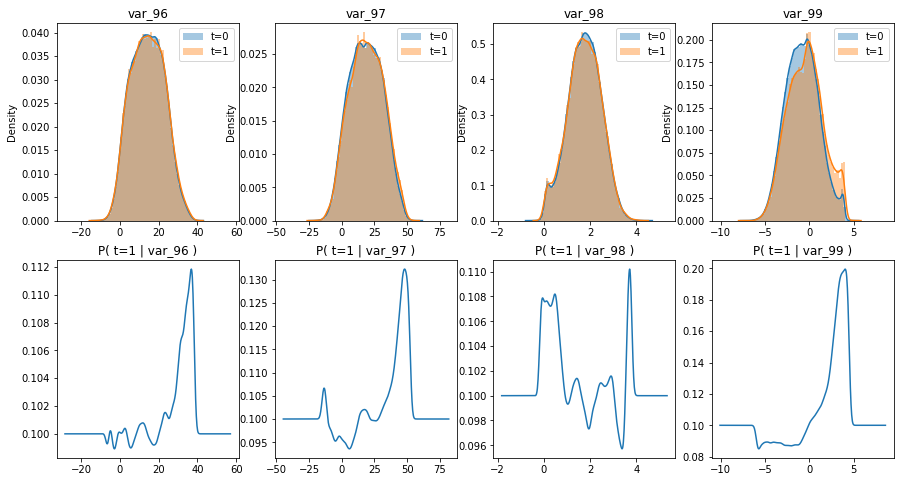

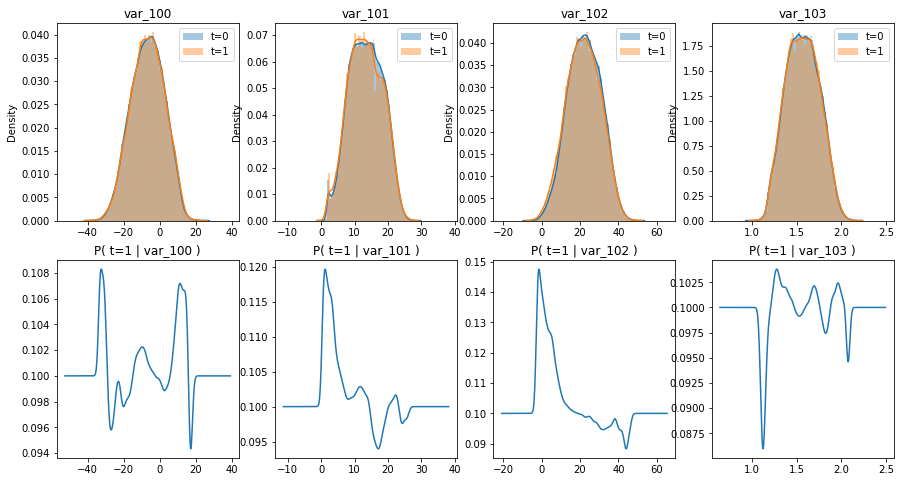

Showing vars 104 to 111 ...


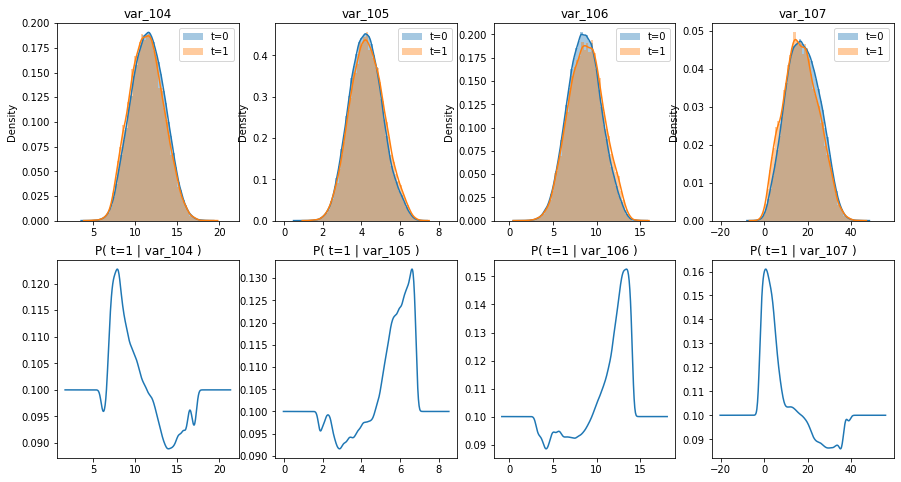

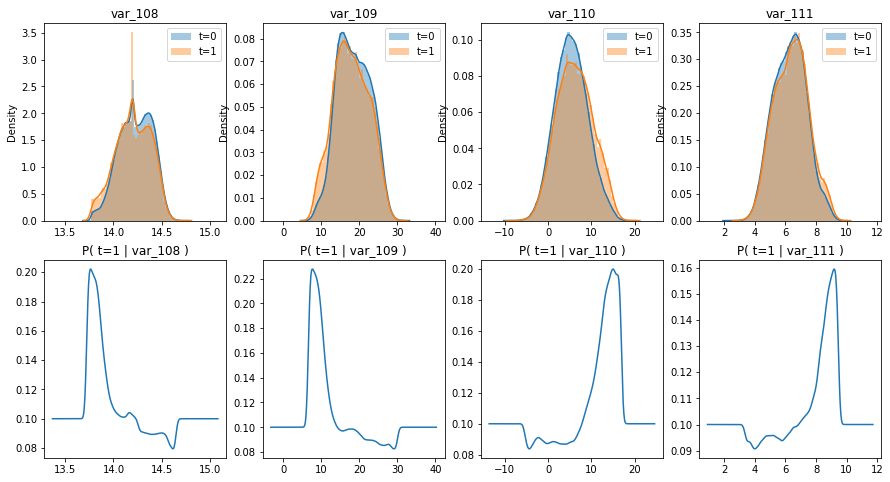

Showing vars 112 to 119 ...


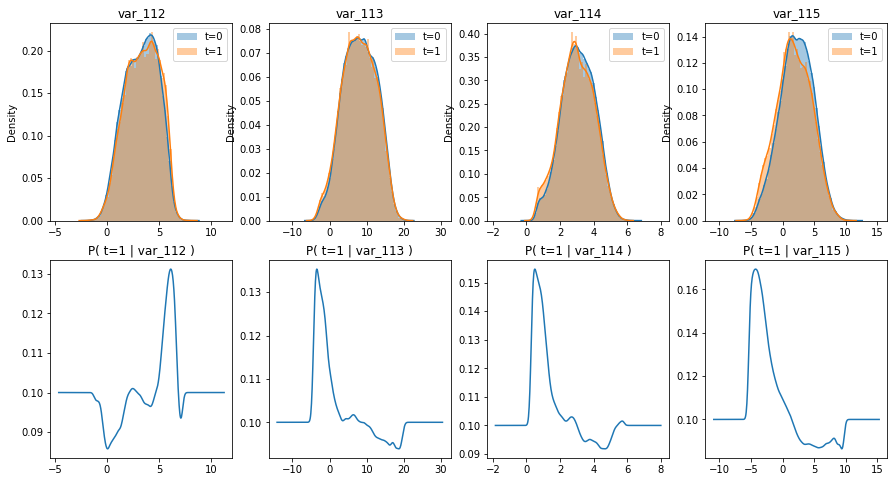

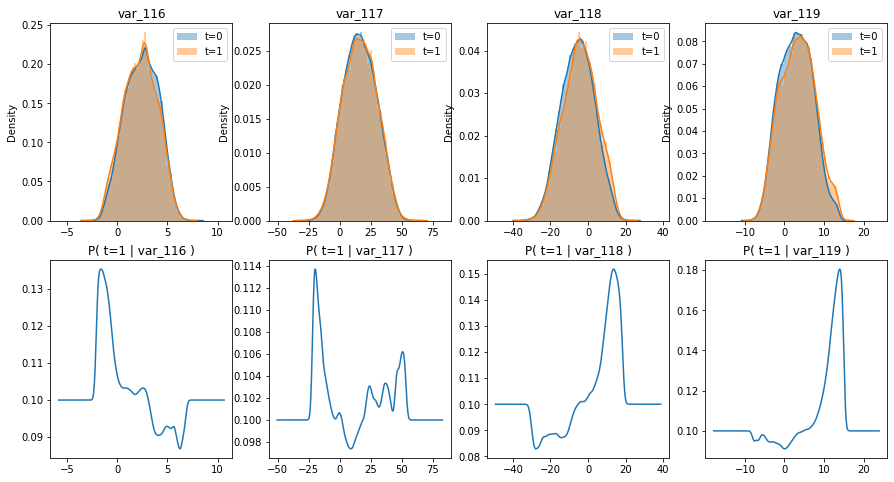

Showing vars 120 to 127 ...


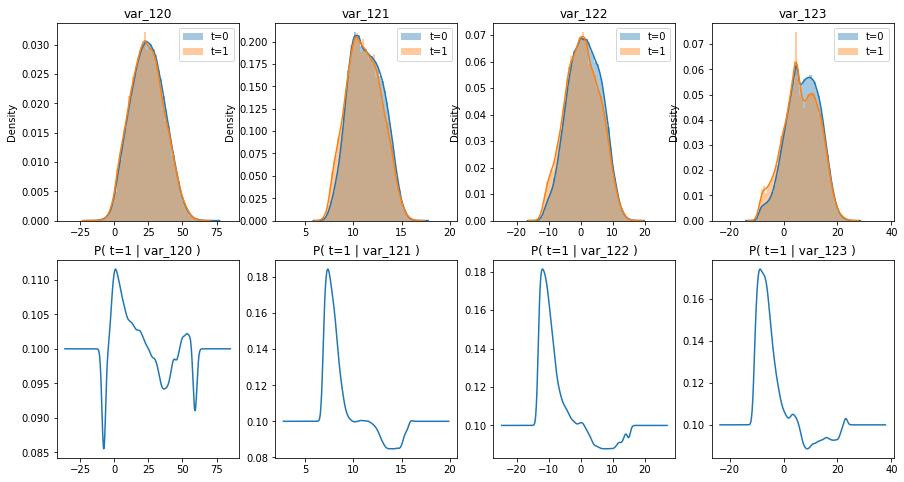

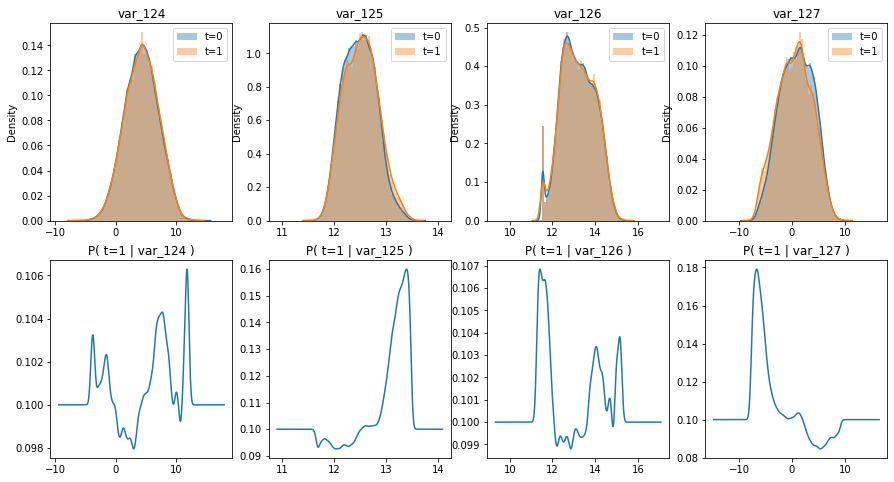

Showing vars 128 to 135 ...


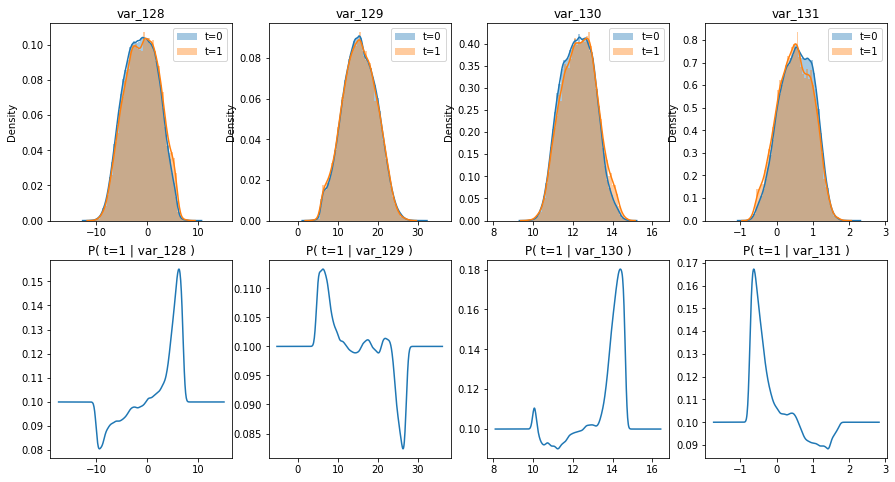

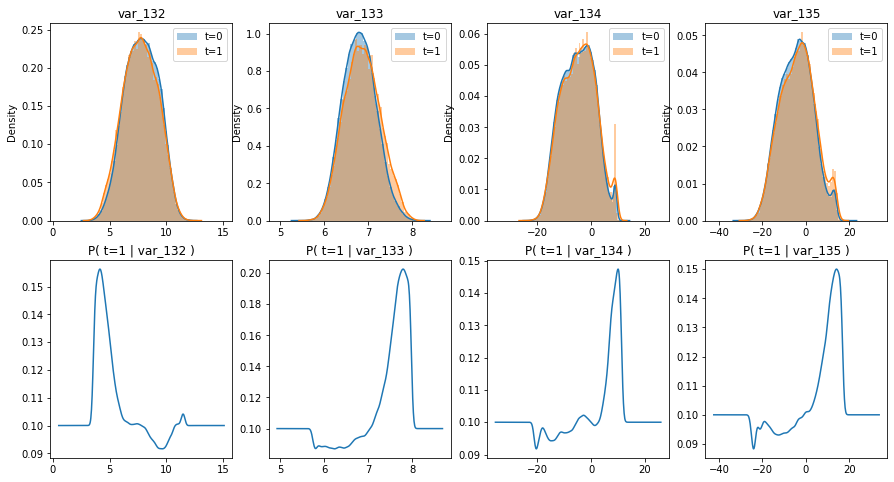

Showing vars 136 to 143 ...


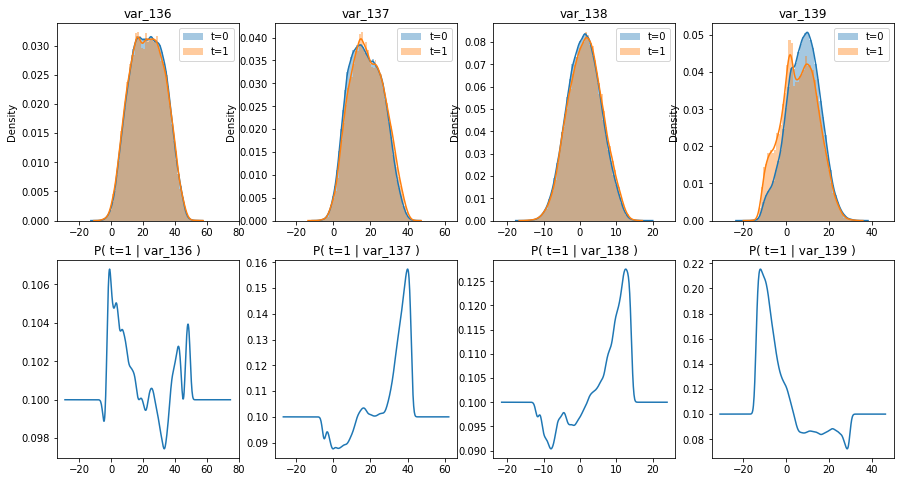

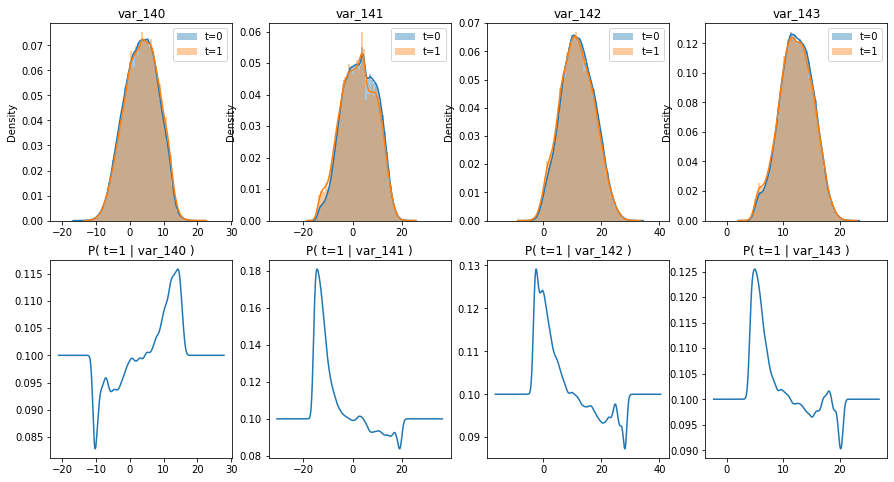

Showing vars 144 to 151 ...


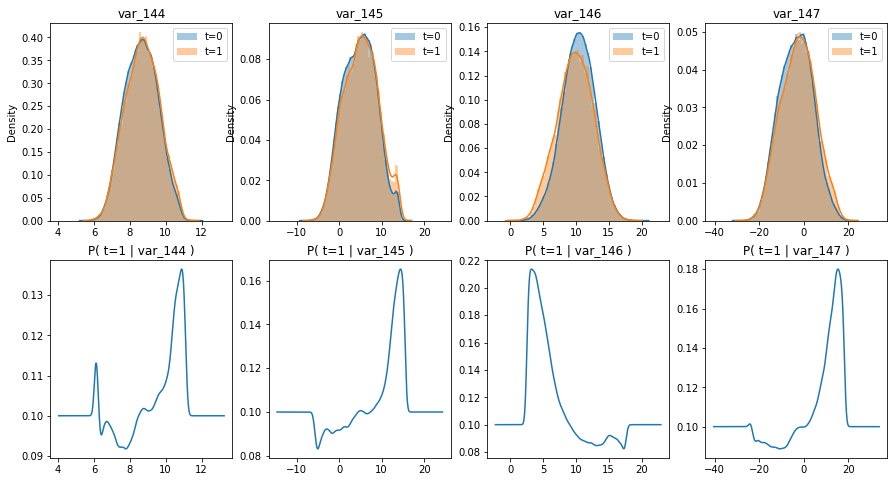

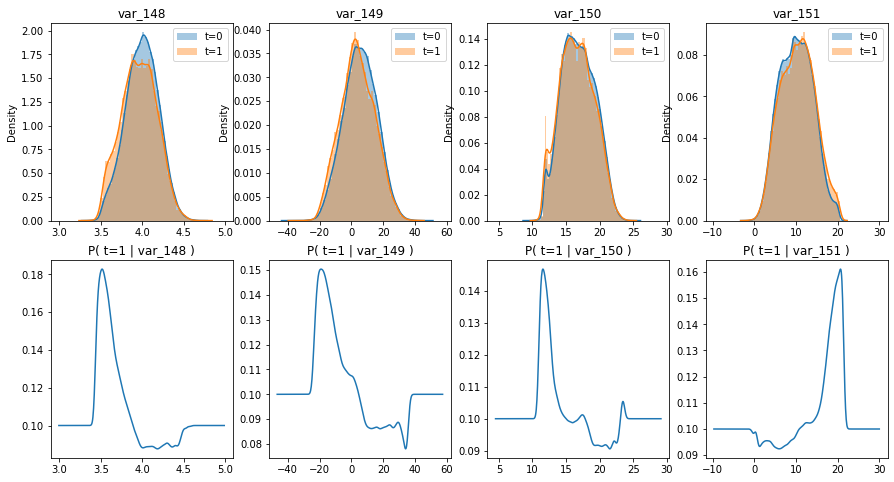

Showing vars 152 to 159 ...


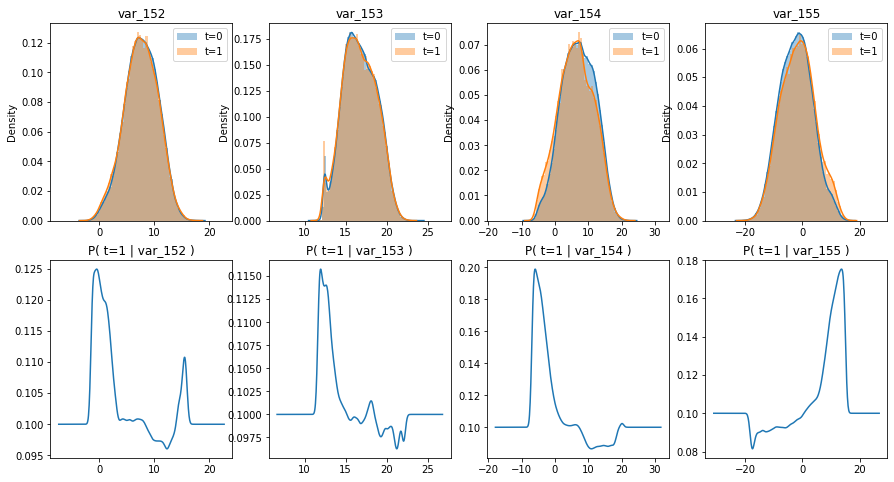

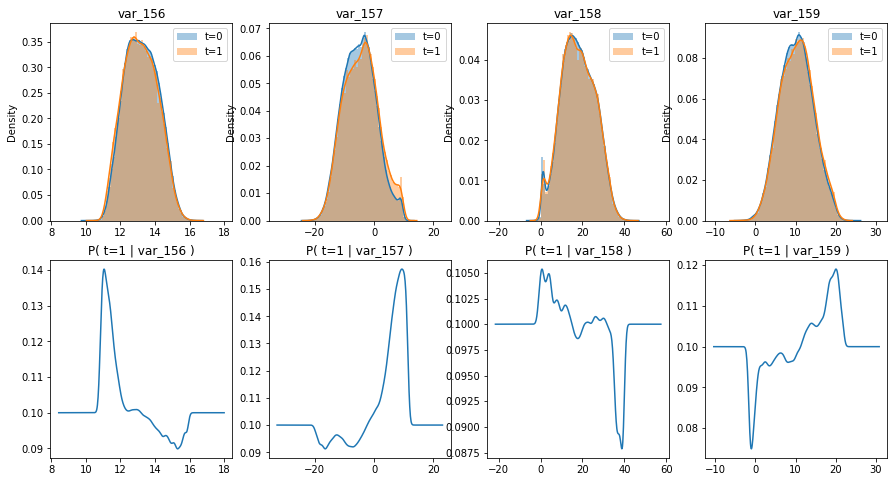

Showing vars 160 to 167 ...


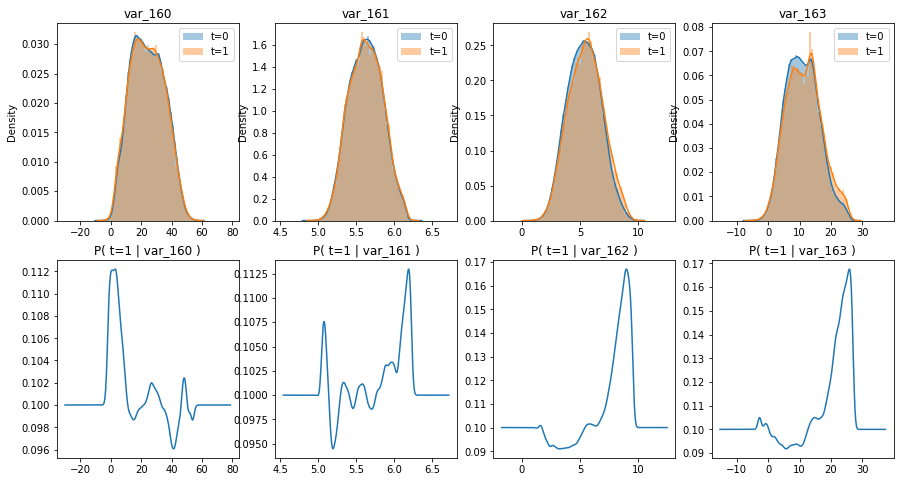

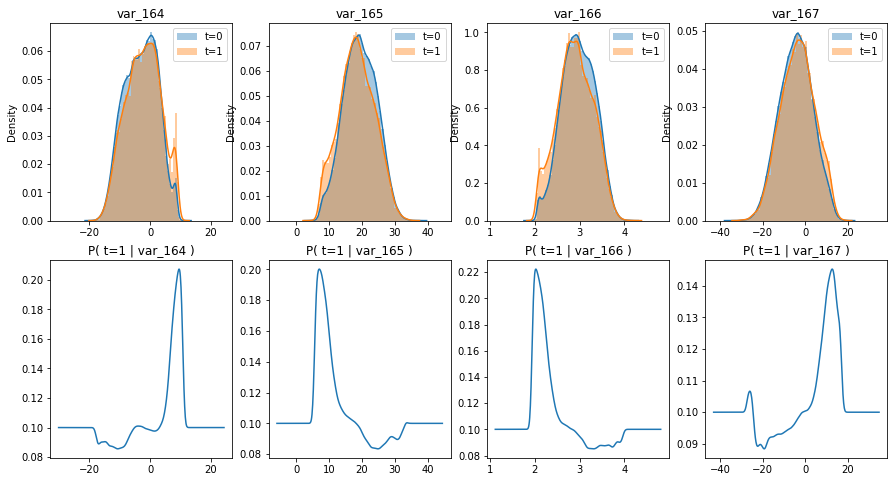

Showing vars 168 to 175 ...


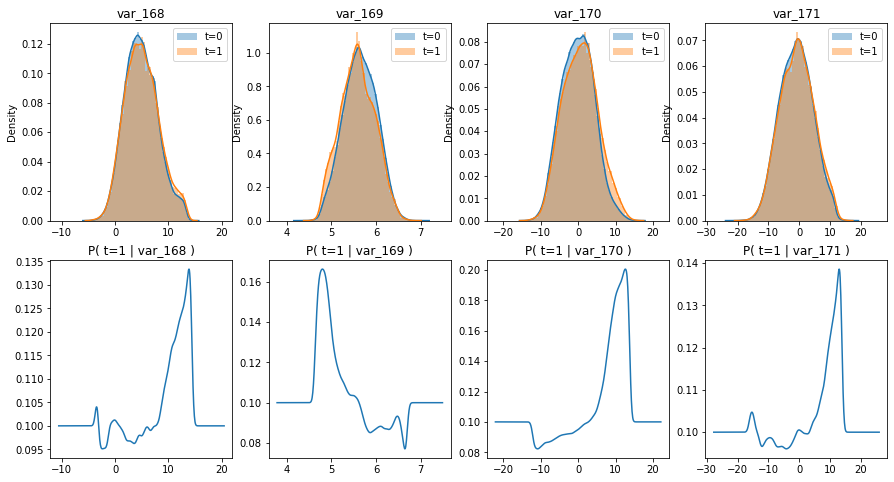

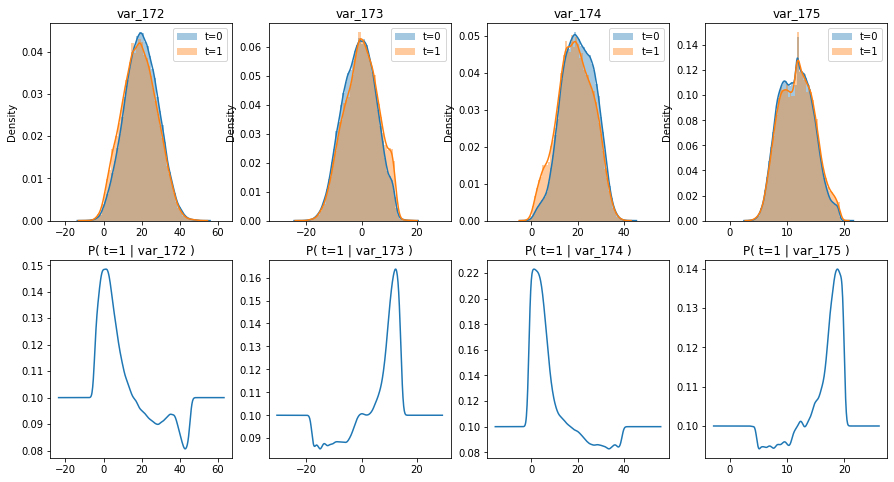

Showing vars 176 to 183 ...


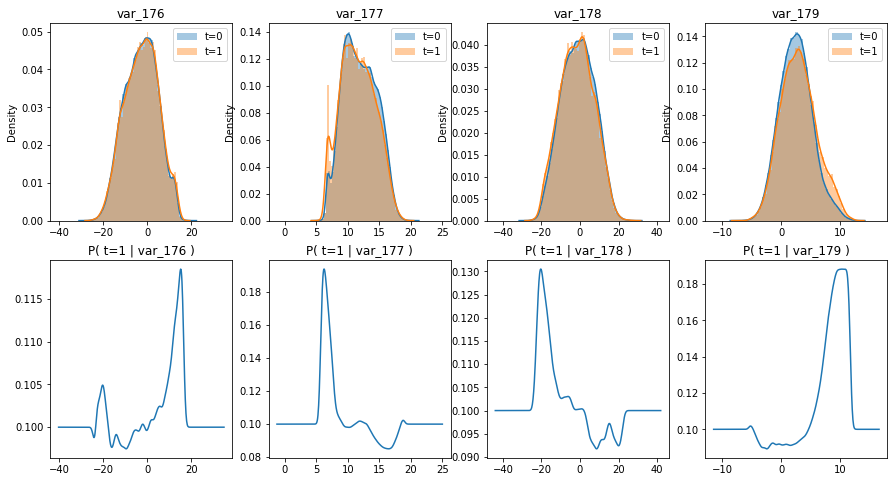

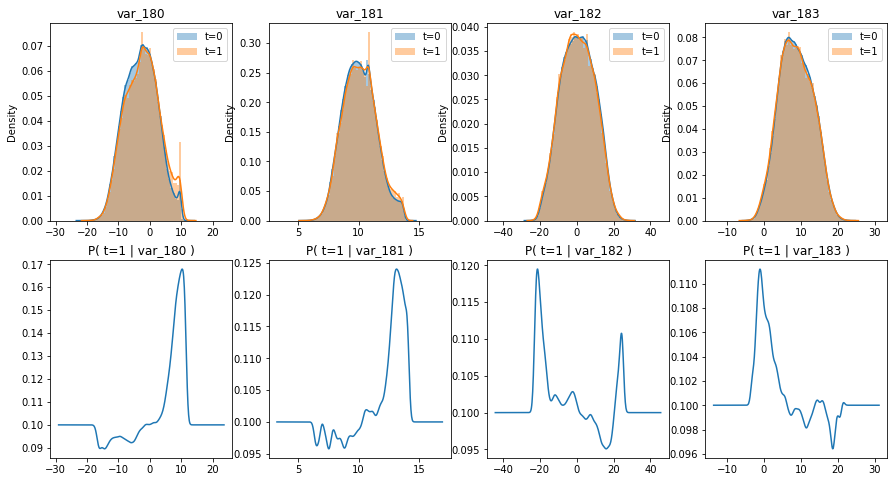

Showing vars 184 to 191 ...


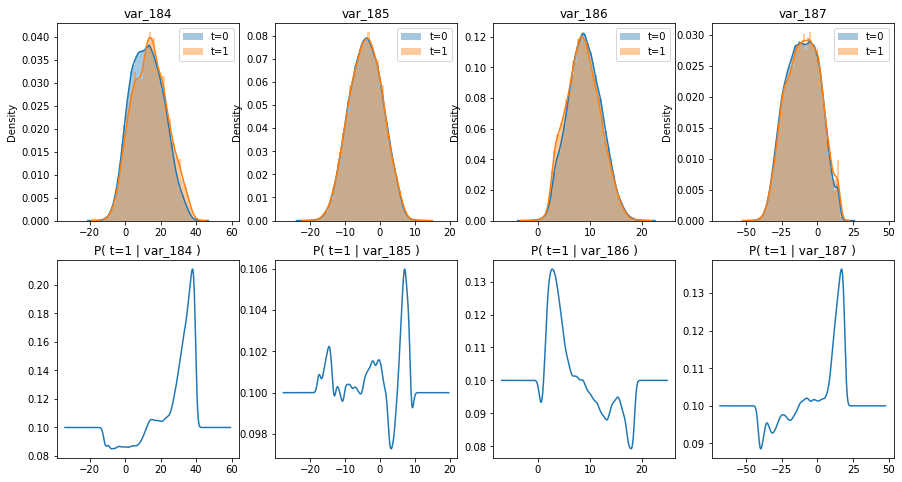

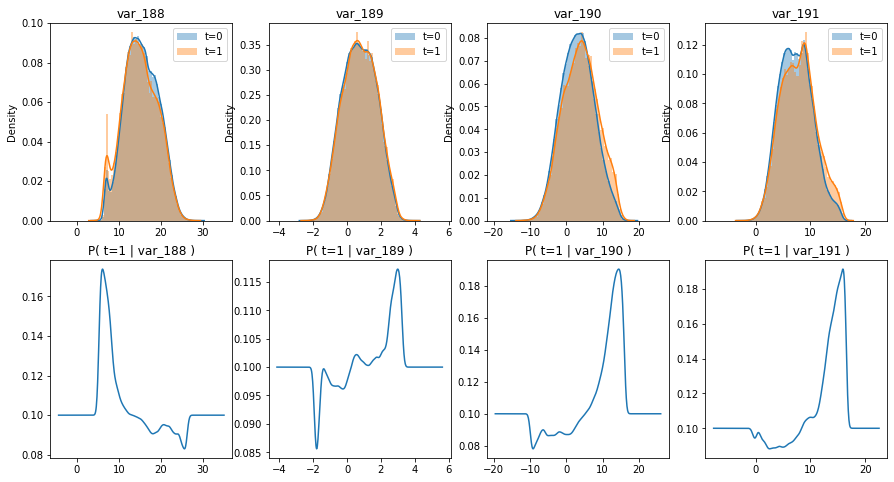

Showing vars 192 to 199 ...


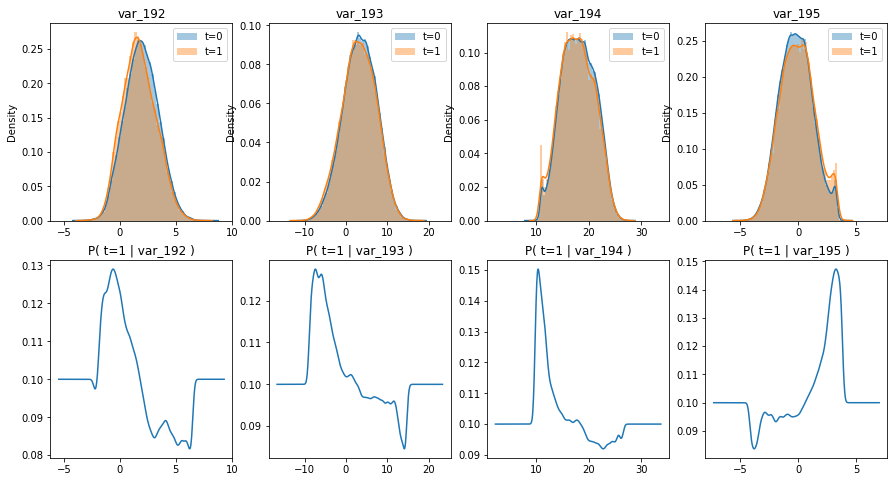

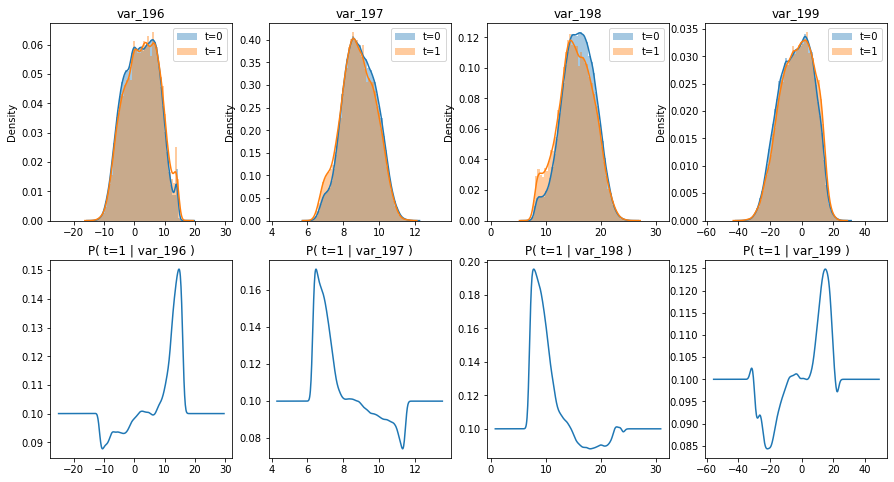

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Picture = True
rmin=-5; rmax=5; 
res=501
pr = 0.1 * np.ones((200,res))
pr2 = pr.copy()
xr = np.zeros((200,res))
xr2 = xr.copy()
ct2 = 0
for j in range(50):
    if Picture: plt.figure(figsize=(15,8))
    for v in range(4):
        ct = 0
        for i in np.linspace(rmin,rmax,res):
            pr[v+4*j,ct] = getp(v+4*j,m[v+4*j]+i*s[v+4*j])
            xr[v+4*j,ct] = m[v+4*j]+i*s[v+4*j]
            xr2[v+4*j,ct] = i
            ct += 1
        if Picture:
            pr2[v+4*j,:] = smooth(pr[v+4*j,:],res//10)
            plt.subplot(2, 4, ct2%4+5)
            plt.plot(xr[v+4*j,:],pr2[v+4*j,:],'-')
            plt.title('P( t=1 | var_'+str(v+4*j)+' )')
            xx = plt.xlim()
            plt.subplot(2, 4, ct2%4+1)            
            sns.distplot(train0['var_'+str(v+4*j)], label = 't=0')
            sns.distplot(train1['var_'+str(v+4*j)], label = 't=1')
            plt.title('var_'+str(v+4*j))
            plt.legend()
            plt.xlim(xx)
            plt.xlabel('')
        if (ct2%8==0): print('Showing vars',ct2,'to',ct2+7,'...')
        ct2 += 1
    if Picture: plt.show()

In [4]:
def getp2(i,x):
    z = (x-m[i])/s[i]
    ss = (rmax-rmin)/(res-1)
    if res%2==0: idx = min( (res+1)//2 + z//ss, res-1)
    else: idx = min( (res+1)//2 + (z-ss/2)//ss, res-1)
    idx = max(idx,0)
    return pr[i,int(idx)]

In [5]:
from sklearn.metrics import roc_auc_score
print('Calculating 200000 predictions and displaying a few examples...')
pred = [0]*200000; ct = 0
for r in train.index:
    p = 0.1
    for i in range(200):
        p *= 10*getp2(i,train.iloc[r,2+i])
    if ct%25000==0: print('train',r,'has target =',train.iloc[r,1],'and prediction =',p)
    pred[ct]=p; ct += 1
print('###############')
print('Validation AUC =',roc_auc_score(train['target'], pred))

Calculating 200000 predictions and displaying a few examples...
train 0 has target = 0 and prediction = 0.020849097518485876
train 25000 has target = 0 and prediction = 0.047234280974034905
train 50000 has target = 0 and prediction = 0.10883774386764035
train 75000 has target = 0 and prediction = 0.6218646945701704
train 100000 has target = 0 and prediction = 0.12978893156190568
train 125000 has target = 0 and prediction = 0.019172676892370028
train 150000 has target = 0 and prediction = 0.0620863147443581
train 175000 has target = 0 and prediction = 0.0716070547437789
###############
Validation AUC = 0.9055702103328558


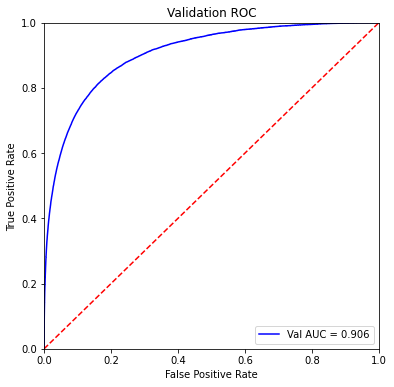

In [6]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(train['target'], pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
test = pd.read_csv('C:/Users/hp 850/Desktop/test.csv')
print('Calculating 200000 predictions and displaying a few examples...')
pred = [0]*200000; ct = 0
for r in test.index:
    p = 0.1
    for i in range(200):
        p *= 10*getp2(i,test.iloc[r,1+i])
    if ct%25000==0: print('test',r,'has prediction =',p)
    pred[ct]=p
    ct += 1
sub = pd.read_csv('C:/Users/hp 850/Desktop/submission.csv')
sub['target'] = pred
sub.to_csv('submission.csv',index=False)
print('###############')
print('Finished. Wrote predictions to submission.csv')

Calculating 200000 predictions and displaying a few examples...
test 0 has prediction = 0.2082829737241022
test 25000 has prediction = 0.08746040244836348
test 50000 has prediction = 0.03525447935028704
test 75000 has prediction = 0.020404861938145294
test 100000 has prediction = 0.023421247991439808
test 125000 has prediction = 0.03731506699908677
test 150000 has prediction = 0.4077818139424838
test 175000 has prediction = 0.07305722168183842
###############
Finished. Wrote predictions to submission.csv


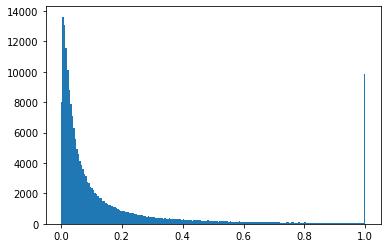

In [8]:
sub.loc[ sub['target']>1 , 'target'] = 1
b = plt.hist(sub['target'], bins=200)